In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering, AffinityPropagation

In [2]:
train_dataset=pd.read_csv("../data/raw/train.csv")
train_dataset.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [3]:
train_dataset = train_dataset.dropna()
train_dataset.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [4]:
train_dataset.reset_index(inplace=True)

In [5]:
train_dataset=train_dataset.drop(['id','index'], axis = 1)
train_dataset.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


#### clustering

#### k-means clustering for authors column

In [6]:
DF_authors1=train_dataset.loc[:,['title','author']]
DF_authors=train_dataset.loc[:,['title','author']]
DF_authors.head(10)

,title,author
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn
2,Why the Truth Might Get You Fired,Consortiumnews.com
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane
8,Obama’s Organizing for Action Partners with So...,Aaron Klein
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
DF_authors['author']=encoder.fit_transform(DF_authors['author'].astype('str'))
DF_authors['title']=encoder.fit_transform(DF_authors['title'].astype('str'))
DF_authors['author']

0         887
1         858
2         783
3        1655
4        1396
         ... 
18280    1643
18281     478
18282    2448
18283     131
18284     934
Name: author, Length: 18285, dtype: int64

In [8]:
DF_authors.head()

,title,author
0,7002,887
1,5380,858
2,17017,783
3,119,1655
4,7845,1396


In [9]:
DF_authors["author"] = DF_authors["author"]/DF_authors["author"].max()
DF_authors["title"] = DF_authors["title"]/DF_authors["title"].max()
DF_authors.tail()

,title,author
18280,0.656999,0.428199
18281,0.551757,0.124576
18282,0.510429,0.637998
18283,0.554155,0.034141
18284,0.929838,0.243419


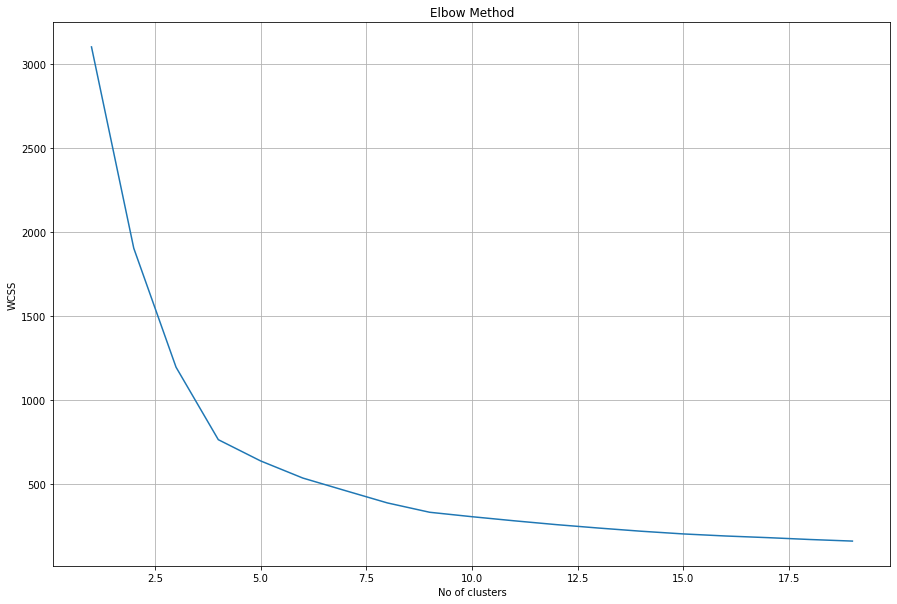

In [10]:
X = DF_authors
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =100, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### by elbow method we can consider k value as 4

In [11]:
kmeans = KMeans(n_clusters= 4, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)
DF_authors1["Clusters"] = Y_Kmeans

In [12]:
print(len(X[kmeans.labels_ == 0]))
print(len(X[kmeans.labels_ == 1]))
print(len(X[kmeans.labels_ == 2]))
print(len(X[kmeans.labels_ == 3]))

5176
3982
5193
3934


In [13]:
DF_authors1.tail()

,title,author,Clusters
18280,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,2
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,2
18282,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,1
18283,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,2
18284,What Keeps the F-35 Alive,David Swanson,2


#### k-means clustering for using text ,title and author

In [14]:
DF_authors1_text=train_dataset.loc[:,['title','author','text']]
DF_authors_text=train_dataset.loc[:,['title','author','text']]
DF_authors_text.head(10)

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
DF_authors_text['author']=encoder.fit_transform(DF_authors_text['author'].astype('str'))
DF_authors_text['title']=encoder.fit_transform(DF_authors_text['title'].astype('str'))
DF_authors_text['text']=encoder.fit_transform(DF_authors_text['text'].astype('str'))
DF_authors_text.head()

,title,author,text
0,7002,887,7109
1,5380,858,5593
2,17017,783,17003
3,119,1655,15469
4,7845,1396,11578


In [16]:
DF_authors_text["author"] = DF_authors_text["author"]/DF_authors_text["author"].max()
DF_authors_text["title"] = DF_authors_text["title"]/DF_authors_text["title"].max()
DF_authors_text.tail()

,title,author,text
18280,0.656999,0.428199,11919
18281,0.551757,0.124576,16856
18282,0.510429,0.637998,13791
18283,0.554155,0.034141,9431
18284,0.929838,0.243419,430


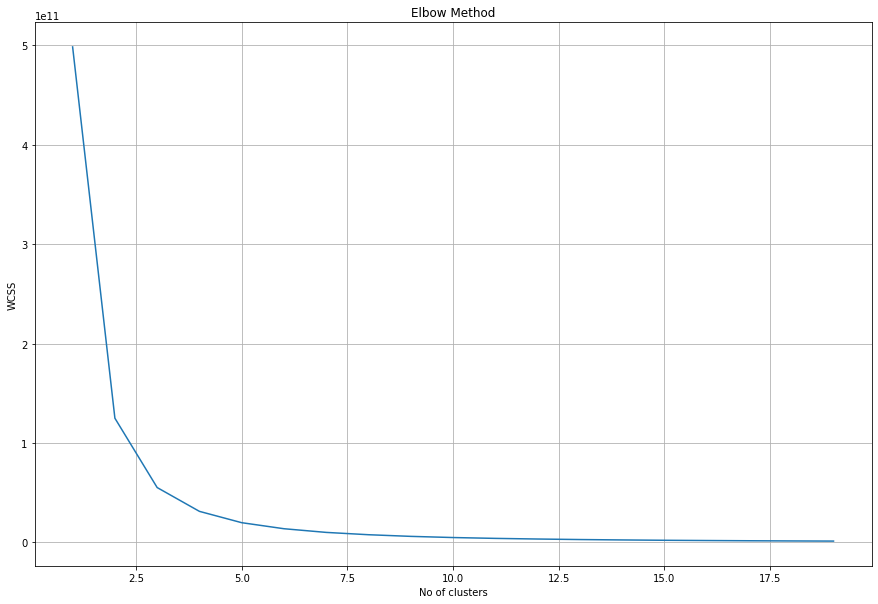

In [17]:
X = DF_authors_text
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =100, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(range(1,20),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [18]:
kmeans = KMeans(n_clusters= 4, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)
DF_authors1_text["Clusters"] = Y_Kmeans

In [19]:
print(len(X[kmeans.labels_ == 0]))
print(len(X[kmeans.labels_ == 1]))
print(len(X[kmeans.labels_ == 2]))
print(len(X[kmeans.labels_ == 3]))

4462
4596
4691
4536


In [20]:
DF_authors1_text.tail()

,title,author,text,Clusters
18280,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,3
18281,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",3
18284,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",2


In [28]:
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
# Prepare models
kmeans = KMeans(n_clusters=4).fit(DF_authors_text)
normalized_vectors = preprocessing.normalize(DF_authors_text)
normalized_kmeans = KMeans(n_clusters=4).fit(normalized_vectors)
print('kmeans: {}'.format(silhouette_score(DF_authors_text, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))

kmeans: 0.5707202400597272
Cosine kmeans:0.995273627762409
